In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [22]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
df = pd.read_csv("output.csv")

In [24]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [25]:
# df.drop(columns=["ArticleId"] , inplace =True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Review  1000 non-null   object
 1   Liked    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [27]:
df.isnull().sum()

 Review    0
Liked      0
dtype: int64

In [78]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df["Liked"] = df["Liked"].astype(int)

5


### Histogram of News Category Column

Text(0, 0.5, 'count')

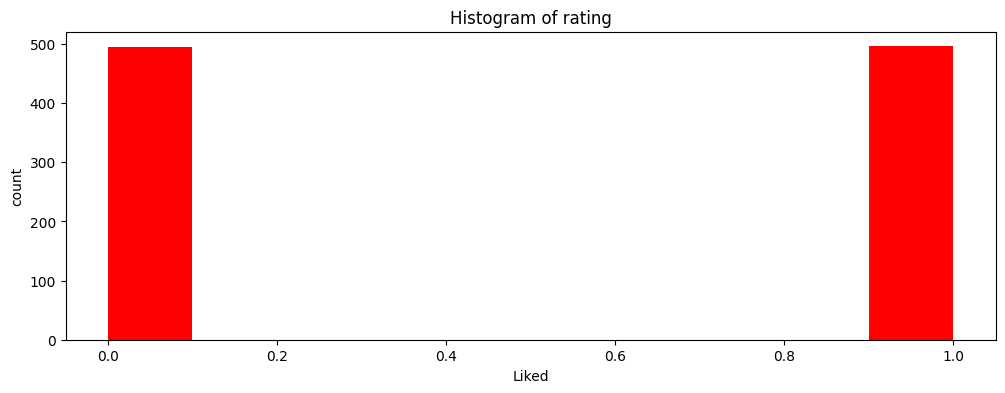

In [79]:
plt.figure(figsize=(12,4) )
plt.hist(df["Liked"]  , color="red")
plt.title("Histogram of rating")
plt.xlabel("Liked")
plt.ylabel("count")

## Cleaning of Text Data

In [80]:
def cleaning(text):
    text = re.sub(r'' , "" , text)
    text = re.sub(r'[^a-zA-Z0-9\s]' , "" , text)
    text = text.lower()
    return text
df[" Review"] = df[" Review"].apply(cleaning)

In [81]:
df.sample(5)

,Review,Liked
518,anyway think go back,0
699,anyways food definitely filling price pay expect,0
616,friend like bloody mary,0
271,cant go wrong food,1
163,avoid cost,0


## Remove stopwords , Apply lemmatization

In [82]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [83]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [84]:
new_sent =[]
corpus_for_word2vec=[]
for sent in df[" Review"]:
   sent_arr = word_tokenize(sent)
   sent_arr =[lemmatizer.lemmatize(word) for word in sent_arr if word not in stopwords]
   sent = " ".join(sent_arr)
   corpus_for_word2vec.append(sent_arr)
   new_sent.append(sent)

df[" Review"] = new_sent

In [85]:
df.head()

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1


## Split Data into Train and Test set

In [86]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(df[[" Review"]] , df["Liked"]  , test_size =0.2 , random_state =42)

# Convert Text to Vector usinf Bag of Words

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
bog = CountVectorizer()
bog.fit(x_train[' Review'])
x_train_new= pd.DataFrame(bog.transform(x_train[' Review']).toarray())
x_test_new = pd.DataFrame(bog.transform(x_test[' Review']).toarray())

In [88]:
x_train_new.head()

,0,1,2,3,4,5,6,7,8,9,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Apply ML Algo
### 1. RandomForest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_new , y_train)
y_pred = rfc.predict(x_test_new)

In [90]:
from sklearn.metrics import accuracy_score
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.7236180904522613


### 2. Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_new , y_train)
y_pred = lr.predict(x_test_new)

In [92]:
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.7587939698492462


# Convert Text to Vector usinf TFIDF



In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(x_train[" Review"])
x_train_tf=pd.DataFrame(tfidf.transform(x_train[" Review"]).toarray())
x_test_tf=pd.DataFrame(tfidf.transform(x_test[' Review']).toarray())

In [94]:
x_train_tf.head()

,0,1,2,3,4,5,6,7,8,9,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465409


## Apply Ml Algo
### 1. RandomForest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_tf , y_train)
y_pred = rfc.predict(x_test_tf)
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.7035175879396985


### 2. Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_tf , y_train)
y_pred = lr.predict(x_test_tf)
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.7537688442211056


# Word2vec

In [97]:
from gensim.models import Word2Vec
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

# Define a function to apply average Word2Vec embedding
def apply_avg2wordvec(sent):
    sent = [word for word in sent if word in model.index_to_key]
    if not sent:  # Check if sent is empty after filtering
        return np.zeros(model.vector_size)  # Return zero vector if sent is empty
    else:
        return np.mean(model[sent], axis=0)

# Apply average Word2Vec embedding to each sentence in corpus
vector_corpus = [apply_avg2wordvec(s) for s in corpus_for_word2vec]

# Convert the list of vectors to numpy array
x = np.array(vector_corpus)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, df["Liked"], test_size=0.2, random_state=42)

In [98]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(y_train)
# y_train = le.transform(y_train)
# y_test = le.transform(y_test)

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(x_train , y_train)
y_pred = rfc.predict(x_test)
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.7688442211055276


In [108]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)
print(f"accuracy_score {accuracy_score(y_test ,y_pred)}")

accuracy_score 0.7889447236180904


In [109]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=300, max_depth=10 ,learning_rate=0.1)
bst.fit(x_train, y_train)
# make predictions
preds = bst.predict(x_test)
y_pred= bst.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy_score :- " , accuracy_score(y_test ,y_pred))

accuracy_score :-  0.7788944723618091


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(50, input_dim=x_train.shape[1], activation='relu'),
    Dropout(0.7),
    Dense(25, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=1,validation_data =(x_test , y_test) )

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/80
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4910 - loss: 0.7182 - val_accuracy: 0.6784 - val_loss: 0.6663
Epoch 2/80
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6043 - loss: 0.6602 - val_accuracy: 0.7538 - val_loss: 0.6084
Epoch 3/80
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6407 - loss: 0.6136 - val_accuracy: 0.7588 - val_loss: 0.5145
Epoch 4/80
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6631 - loss: 0.5968 - val_accuracy: 0.7487 - val_loss: 0.4915
Epoch 5/80
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7074 - loss: 0.5444 - val_accuracy: 0.7538 - val_loss: 0.4989
Epoch 6/80
792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7303 - loss: 0.5485 - val_accuracy: 0.7739 - val_loss: 0.4838
Epoch 7/80
792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7292 - loss: 0.4995 - val_accuracy: 0.7789 - val_loss: 0.4603
Epoch 8/80
792/792 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7799 - loss: 0.4847 - val_accuracy: 0.